<a href="https://colab.research.google.com/github/htapiagroup/fis_uv/blob/master/MapeoLogistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$x_{n+1} = r x_n(1-x_n) $

In [0]:
import matplotlib.pyplot as plt

In [0]:
r = 3.8
lista = []

for i in range(100):
  x = i/100
  m1 = r*x*(1-x)
  m2 = r*m1*(1-m1)
  m3 = r*m2*(1-m2)
  
  lista.append([x, m1, m2, m3])
  
plt.plot(lista)  

In [0]:
def MapeoLogistico(r, x):
  
  return r*x*(1-x)

In [0]:
r = 3.8
lista = []

for i in range(100):
  x = i/100
  m1 = mapa(r, x)
  m2 = mapa(r, m1) #   m2 = r*m1*(1-m1)
#   m3 = r*m2*(1-m2)
  
  lista.append([x, m1, m2])
  
plt.plot(lista)  

Ahora vamos a mejorar el codigo para que sea mas elegante y eficiente (los fors no son eficientes, en algunos casos pueden parecer elegantes pero definitivamente no son eficientes). Lo que queremos hacer es aplicar el mapeo logistico muchas veces a nuestras condiciones iniciales (los cien puntos en el intervalo unitario) de forma efectiva. Lo primero que nos convendria hacer es definir estos puntos de una mejor manera, asi que es el momento de introducir a `numpy`

In [0]:
import numpy as np

`numpy` tiene una funcion muy conveniente que les permite generar una muestra homogenea en un intervalo

In [0]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

Por defecto la funcion `linspace`, que se traduce como "espacio lineal", genera 50 puntos separados por la misma distancia entre los puntos de inicio y fin  indicados; en mi caso entre 0 y 1. Asi, puedo declarar y asignar la variable `x` de los puntos iniciales en el intervalo como sigue

In [0]:
x = np.linspace(0,1,100)

La ventaja de un arreglo de `numpy` es que tiene muchos metodos utiles. Pero comencemos por aplicar nuestra funcion `MapeoLogistico` a este arreglo, claramente el resultado debe ser el mismo que la segunda columna de nuestra variable `lista`

In [0]:
ML1 = MapeoLogistico(3.8, x)
print(ML1)

[0.         0.03799612 0.07521681 0.11166208 0.1473319  0.1822263
 0.21634527 0.24968881 0.28225691 0.31404959 0.34506683 0.37530864
 0.40477502 0.43346597 0.46138149 0.48852158 0.51488624 0.54047546
 0.56528926 0.58932762 0.61259055 0.63507805 0.65679012 0.67772676
 0.69788797 0.71727375 0.73588409 0.75371901 0.77077849 0.78706254
 0.80257117 0.81730436 0.83126212 0.84444444 0.85685134 0.86848281
 0.87933884 0.88941945 0.89872462 0.90725436 0.91500867 0.92198755
 0.928191   0.93361902 0.9382716  0.94214876 0.94525048 0.94757678
 0.94912764 0.94990307 0.94990307 0.94912764 0.94757678 0.94525048
 0.94214876 0.9382716  0.93361902 0.928191   0.92198755 0.91500867
 0.90725436 0.89872462 0.88941945 0.87933884 0.86848281 0.85685134
 0.84444444 0.83126212 0.81730436 0.80257117 0.78706254 0.77077849
 0.75371901 0.73588409 0.71727375 0.69788797 0.67772676 0.65679012
 0.63507805 0.61259055 0.58932762 0.56528926 0.54047546 0.51488624
 0.48852158 0.46138149 0.43346597 0.40477502 0.37530864 0.34506

Esta lista no nos dice mucho realmente, pero la podemos graficar junto con la lista (arreglo) de condiciones iniciales `x`. Noten como ahora la grafica se invoca en dos llamados _porque las listas estan separadas_

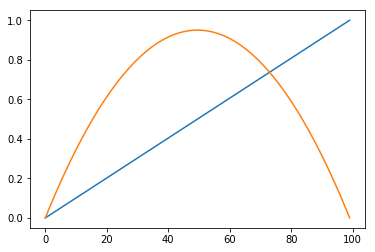

In [0]:
plt.plot(x)
plt.plot(ML1)

La siguiente instruccion grafica los pares ordenados `(a,b)` formados por elementos `a` de la primera lista y `b` de la segunda columna. Para que esta instruccion funcione ambas listas, en este caso `x` y `ML1` deben tener las mismas dimensiones

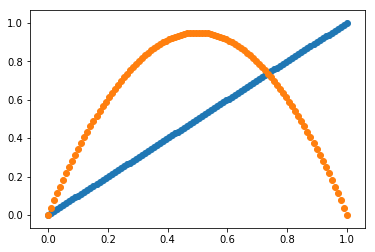

In [0]:
plt.scatter(x,x)
plt.scatter(x,ML1)

Asi de sencillo es eliminar los `for` de nuestras vidas. Elegante no? Pero como sabemos que realmente es mas eficiente? Vamos a medir el tiempo que el sistema se tarda en evaluar la misma funcion sobre las condiciones iniciales, usando el `for` y usando el arreglo de `numpy`. Para eso repetimos el codigo que hace de manera secuencial el mapeo de cada punto, pero antecedemos la evaluacion con el comando `%time`

In [0]:
# estas definiciones no queremos 
# que sean parte de la evaluacion, 
# son iguales para ambos experimentos
r = 3.8
lista = [] 

In [0]:
%time

for i in range(100):
  x = i/100
  m1 = MapeoLogistico(r, x)
  
  lista.append(m1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [0]:
%time
ML1 = MapeoLogistico(r, np.linspace(0,1,100))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


Too much for blabing that it will be faster, what the fuck man


Es una hueva tener que estar repitiendo codigo, voy a hacer una funcion que haga el for para un numero de iteraciones especificado

In [0]:
def mapeoLogisticoSecuencial(r, x, it):
  
  mls = []
  for i in range(it):
    x = i/it;
    mls.append(MapeoLogistico(r,x))
  return mls

Ahora si, hasta se parecen los llamados a la funcion mas abstracta

In [0]:
%time
ml1 = mapeoLogisticoSecuencial(r, x, 100)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


In [0]:
%time
ML1 = MapeoLogistico(r, np.linspace(0,1,100)) 
# noten como el numero de iteraciones se pasa como argumento a np.linspace

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


Comparemos para listas de tamanos considerables, no 100 puntos, no 500, miles! Bueno, solo 1000000

In [0]:
%time
ml1 = mapeoLogisticoSecuencial(r, x, 1000000)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


In [0]:
%time
ML1 = MapeoLogistico(r, np.linspace(0,1,1000000)) 

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


Andale, a ver veamos 100000000 puntos

In [0]:
%time
ml1 = mapeoLogisticoSecuencial(r, x, 100000000)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [0]:
%time
ML1 = MapeoLogistico(r, np.linspace(0,1,100000000))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


Ustedes que ven en sus sistemas? Yo encuentro poca diferencia asi que me voy a concentrar en otra cosa. Por alguna razon quiero evaluar de forma vectorial el mapeo. Asi como lo tengo, realmente estoy usando operaciones secuenciales, es decir calcula el mapeo del primer elemento de la lista, luego el que sigue, y asi sucesivamente hasta acabar con todos los elementos que tenga la lista. Podre aplicar la operacion simultaneamente a cada uno de los elementos? 

Quisiera que la operacion numerica $rx(1-x)$ aplicada a la lista de valores en el intervalo unitario, que habia bautizado como `x` resulte en una lista de las misma dimensiones que contenga el resultado final aplicado a cada elemento, es decir que lo siguiente fuera lo que espero que sea

In [0]:
x = np.linspace(0,1)

In [0]:
r*x*(1-x)

array([0.        , 0.03598501, 0.07047064, 0.10345689, 0.13494377,
       0.16493128, 0.19341941, 0.22040816, 0.24589754, 0.26988755,
       0.29237818, 0.31336943, 0.33286131, 0.35085381, 0.36734694,
       0.38234069, 0.39583507, 0.40783007, 0.4183257 , 0.42732195,
       0.43481883, 0.44081633, 0.44531445, 0.4483132 , 0.44981258,
       0.44981258, 0.4483132 , 0.44531445, 0.44081633, 0.43481883,
       0.42732195, 0.4183257 , 0.40783007, 0.39583507, 0.38234069,
       0.36734694, 0.35085381, 0.33286131, 0.31336943, 0.29237818,
       0.26988755, 0.24589754, 0.22040816, 0.19341941, 0.16493128,
       0.13494377, 0.10345689, 0.07047064, 0.03598501, 0.        ])

andale! a ver y si lo graficamos?

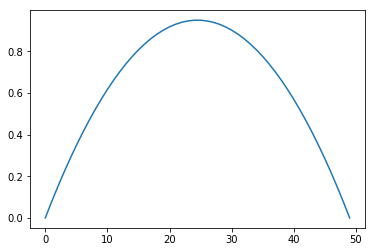

In [0]:
plt.plot(r*x*(1-x))

wow! justo lo que esperabamos. No tenemos ni siquiera que definir una funcion externa que haga la operacion, la podemos ejecutar sobre el arregl. Fijense como estoy simplifica mucho mucho el trabajo; recuerden esta definicion

```
def MapeoLogistico(r, x):
  
  return r*x*(1-x)
```
es identica a la operacion que acabamos de hacer sobre el arreglo de `numpy` `x`



```
r*x*(1-x)
```

por lo tanto puedo hacer simplemente

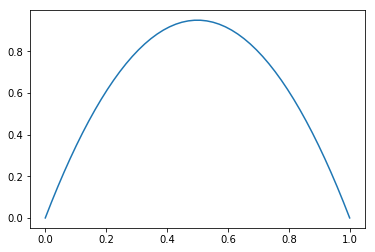

In [0]:
plt.plot(
    x,
MapeoLogistico(r, x)
)

a estas alturas no me gusta usar el nombre `MapeoLogistico` porque se vuelve muy largo para estarlo aplicando de modo util, asi que voy a rebautizarlo como `M`

In [0]:
def M(r, x):
  
  return r*x*(1-x)

Entonces puedo aplicar el mapeo de una forma muy concisa asi

In [0]:
M(r,x)

array([0.        , 0.07596835, 0.14877135, 0.218409  , 0.2848813 ,
       0.34818825, 0.40832986, 0.46530612, 0.51911703, 0.5697626 ,
       0.61724282, 0.66155768, 0.70270721, 0.74069138, 0.7755102 ,
       0.80716368, 0.83565181, 0.86097459, 0.88313203, 0.90212411,
       0.91795085, 0.93061224, 0.94010829, 0.94643898, 0.94960433,
       0.94960433, 0.94643898, 0.94010829, 0.93061224, 0.91795085,
       0.90212411, 0.88313203, 0.86097459, 0.83565181, 0.80716368,
       0.7755102 , 0.74069138, 0.70270721, 0.66155768, 0.61724282,
       0.5697626 , 0.51911703, 0.46530612, 0.40832986, 0.34818825,
       0.2848813 , 0.218409  , 0.14877135, 0.07596835, 0.        ])

Ahora evaluen el siguiente comando 

In [0]:
M(r, M(r, x))

array([0.        , 0.2667492 , 0.48122604, 0.64868473, 0.77415099,
       0.86242214, 0.91806703, 0.94542607, 0.94861125, 0.93150608,
       0.89776566, 0.85081664, 0.7938572 , 0.72985711, 0.66155768,
       0.5914718 , 0.52188387, 0.4548499 , 0.39219743, 0.33552555,
       0.28620492, 0.24537776, 0.21395784, 0.19263049, 0.18185259,
       0.18185259, 0.19263049, 0.21395784, 0.24537776, 0.28620492,
       0.33552555, 0.39219743, 0.4548499 , 0.52188387, 0.5914718 ,
       0.66155768, 0.72985711, 0.7938572 , 0.85081664, 0.89776566,
       0.93150608, 0.94861125, 0.94542607, 0.91806703, 0.86242214,
       0.77415099, 0.64868473, 0.48122604, 0.2667492 , 0.        ])

Si el anterior salio, ahora hagan

In [0]:
M(r, M(r, M(r, x)))

array([0.        , 0.74325744, 0.94866065, 0.86599284, 0.66439669,
       0.45087074, 0.28583585, 0.19606333, 0.1852422 , 0.2424495 ,
       0.34877341, 0.48232521, 0.6218622 , 0.7492297 , 0.85081664,
       0.91820506, 0.94818017, 0.94225358, 0.9058387 , 0.84720298,
       0.77630832, 0.70363656, 0.63908355, 0.59099114, 0.56537246,
       0.56537246, 0.59099114, 0.63908355, 0.70363656, 0.77630832,
       0.84720298, 0.9058387 , 0.94225358, 0.94818017, 0.91820506,
       0.85081664, 0.7492297 , 0.6218622 , 0.48232521, 0.34877341,
       0.2424495 , 0.1852422 , 0.19606333, 0.28583585, 0.45087074,
       0.66439669, 0.86599284, 0.94866065, 0.74325744, 0.        ])

vamos a graficarlo

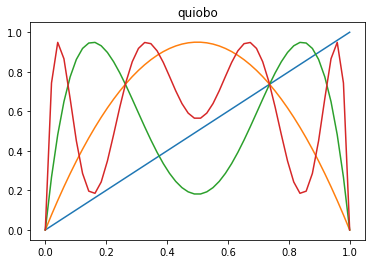

In [0]:
plt.plot(x, x)                  # las condiciones iniciales c.i.
plt.plot(x, M(r, x))            # el primer mapeo de las c.i.
plt.plot(x, M(r, M(r,x)))       # el segundo mapeo de las c.i.
plt.plot(x, M(r, M(r, M(r,x)))) # el tercer mapeo de las c.i.
plt.title('quiobo');         # vieron cuantas eMes aparecen en cada linea anterior

* tienen idea de como implementariamos la iteracion anterior para cualquier $n$? 
* que notan si ademas les pongo asi la graficas


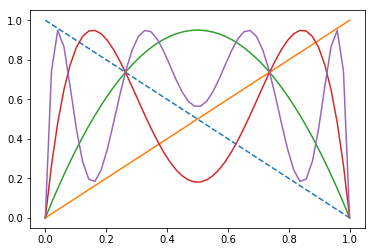

In [0]:
plt.plot(x, 1-x, '--')
plt.plot(x, x)
      
plt.plot(x, M(r, x))            # el primer mapeo de las c.i.
plt.plot(x, M(r, M(r,x)))       # el segundo mapeo de las c.i.
plt.plot(x, M(r, M(r, M(r,x))))
plt.title('chido no?');

Pasara para cualquier valor de $r$? Pues ahora es facil de explorar...

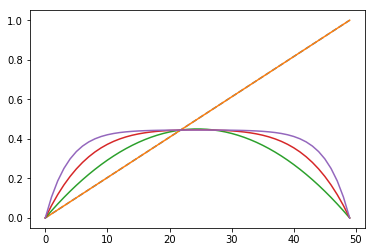

In [0]:
r = 1.8
plt.plot(x, '--')
plt.plot(x)        
plt.plot(M(r, x))            # el primer mapeo de las c.i.
plt.plot(M(r, M(r,x)))       # el segundo mapeo de las c.i.
plt.plot(M(r, M(r, M(r,x))))

Este tipo de exploracion se veria beneficiada si pudieramos cambiar el 

In [0]:

import ipywidgets as widgets

In [0]:
from ipywidgets import interact, interactive, fixed, interact_manual


In [0]:
def f(x):
    return x

In [0]:
interact(f, x=10);


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [0]:
def plotLogs(r, x):
  plt.plot(x, '--')
  plt.plot(x)        
  plt.plot(M(r, x))            # el primer mapeo de las c.i.
  plt.plot(M(r, M(r,x)))       # el segundo mapeo de las c.i.
  plt.plot(M(r, M(r, M(r,x))))

In [0]:
def pl(r):
  return plotLogs(r, x)

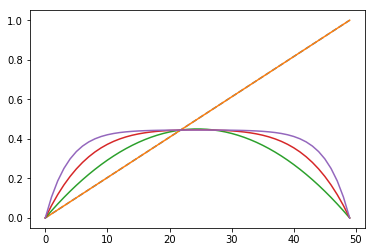

In [0]:
pl(1.8)

In [0]:
interact(pl, r=widgets.IntSlider(min=0, max=4, step=0.1, value=3.8))

interactive(children=(IntSlider(value=3, description='r', max=4, step=0), Output()), _dom_classes=('widget-int…

<function __main__.pl>

In [0]:
interact(pl, r=(0,4,0.2));

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, step=0.2), Output()), _dom_classes=('wi…

In [0]:
w = widgets.IntSlider()

display(w)

IntSlider(value=0)

## Orbitas y diagrama de bifurcacion

Primero vamos a crear las orbitas 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def M(r, x):
  
  return r*x*(1-x)

In [0]:
x = np.linspace(0, 1)

In [0]:
def plot_system(r, x0, n, ax=None, ax1=None):
    # Plot the function and the
    # y=x diagonal line.
    orbit = []
    
    t = np.linspace(0, 1)
    ax.plot(t, M(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = M(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y
        
        orbit.append(x)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")
    
    ax1.plot(orbit)
    ax1.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")
    
    return np.array(orbit)

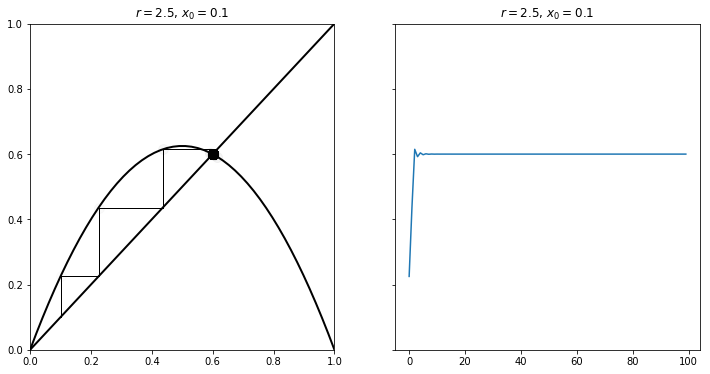

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)

o1 = plot_system(2.5, .1, 100, ax=ax1, ax1=ax2)

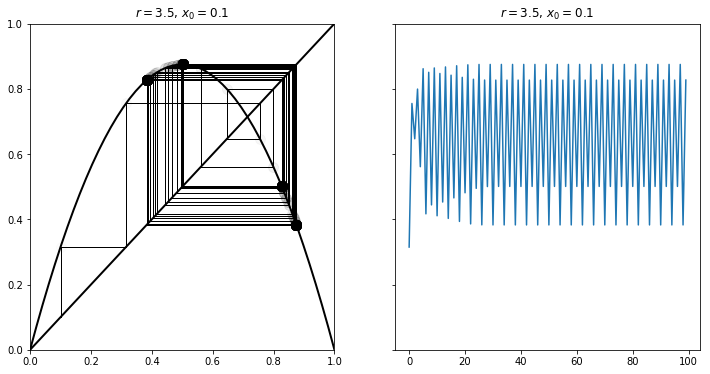

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
o2 = plot_system(3.5, .1, 100, ax=ax1, ax1=ax2)

In [0]:
1-1/3.5

0.7142857142857143

In [0]:
ax1.set_ylim(0.71,0.72)

(0.71, 0.72)

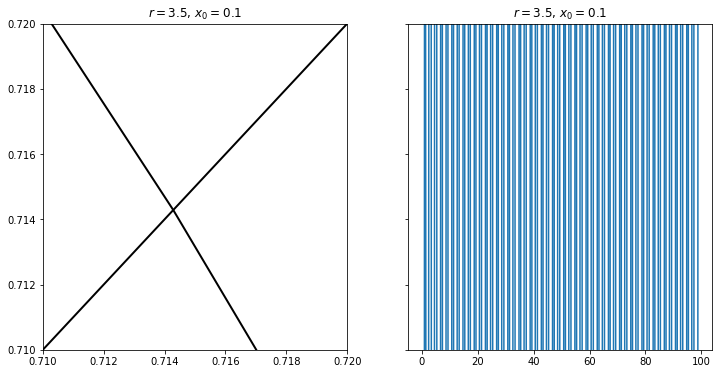

In [0]:
fig

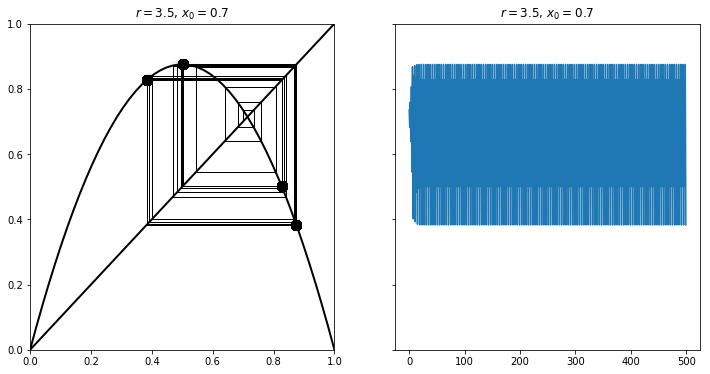

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)

o2 = plot_system(3.5, .7, 500, ax=ax1, ax1=ax2)

# ax1.set_xlim(0.71,0.72)
# ax1.set_ylim(0.71,0.72)


### The bifucartion

In [0]:
n = 10000
r = np.linspace(2.5, 4.0, n)

In [0]:
iterations = 1000
last = 100

In [0]:
x = 1e-5 * np.ones(n)

In [0]:
lyapunov = np.zeros(n)


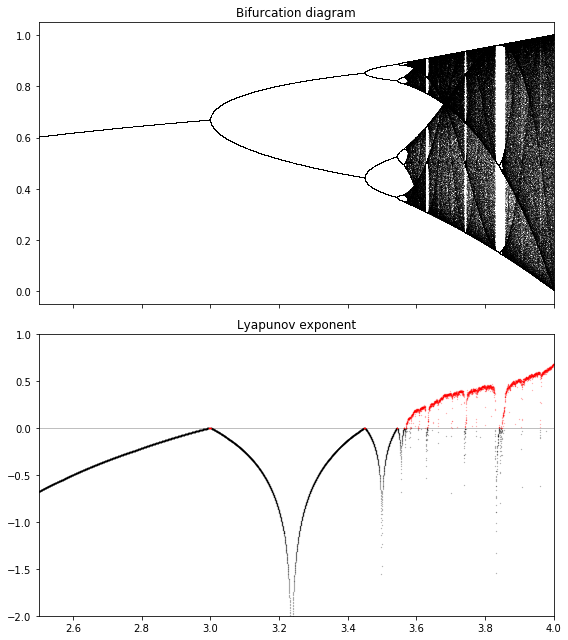

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = M(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()